# Linear Regression With NumPy

-- For more information on this code, watch the video

In this notebook we will explore implimenting a linear regression model using only NumPy.
We will explore three linear regression models: A single variable line, a multivariable hyperplane, and a polynomial.

##### Sections:
1. Defining the linear regression model
2. linear regression with single variable
3. linear regression with multiple variables 
4. polynomial regression

### Imports

In [315]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

## 1. Define the Linear Regression Class

We will use this same model for single variable, multi-variable, and polynomial regression.

In [316]:
class LinearRegression:
    """
    This class is a linear regression model
      
    Attributes:
        poly (boolean): Indicates if the regression model is a polynimial model or not.
        w (int): The weights/parameters of the regression model.
    """
    def __init__(self, poly=False):
        self.poly = poly
    
    def fit(self, X, y):
        # Place a column of ones on the left of the features matrix X
        V = np.column_stack((np.ones(len(X)), X))
        
        # Form the system of equations.
        A = V.T@V
        b = V.T@y
        
        # Solve the system for the least squares solution to the system.
        self.w = np.linalg.lstsq(A, b, rcond=-1)[0]
        
    
    def predict(self, X):
        # Place a column of ones on the left of the features matrix X
        V = np.column_stack((np.ones(len(X)), X))
        return (V@self.w)
    
    
    def __str__(self):
        """Returnes a string representation of the model."""
        
        model_str = 'y = '
        flat_w = self.w.flatten()
        
        for i in range(len(flat_w)):
            if i==0:
                model_str += str(flat_w[i])
            else:
                model_str += ' + ' + str(flat_w[i]) + '*x'
                if self.poly:
                    model_str += '^' + str(i)
                else:
                    model_str += '_' + str(i) 
        
        return model_str

## 2. One Dimensional Regression
First We will look at fiting a 1D line to some data with a single feature.

###### Minimizing the sum of square errors (SSE):

We aim to find the $w_0$ and  $w_1$ values for the line $\hat{y} = w_0 + w_1x$ so that the sum of all square differences between the actual $y$ value and the $\hat{y}$ value of the line are minimized. To do this we find the derivatives and set to zero.

\begin{equation}
    \begin{split}
        SSE(w_0, w_1) & = \sum_{i=1}^{n}(y_i-\hat{y_i})^2 \\
        & = \sum_{i=1}^{n}(y_i-(w_0 + w_1x_i))^2
    \end{split}
\end{equation}


\begin{equation}
    \begin{split}
         \frac{\partial \; SSE(w_0, w_1)}{\partial \; w_0} & = 
         \frac{\partial}{\partial \; w_0} \left[ \sum_{i=1}^{n}(y_i-(w_0 + w_1x_i))^2 \right] \\
         &= 2 \cdot \sum_{i=1}^{n}(y_i-(w_0 + w_1x_i))  \\
    \end{split}
\end{equation}

\begin{equation}
    \begin{split}
         \frac{\partial \; SSE(w_0, w_1)}{\partial \; w_1} & = 
         \frac{\partial}{\partial \; w_1} \left[ \sum_{i=1}^{n}(y_i-(w_0 + w_1x_i))^2 \right] \\
         &= 2 \cdot \sum_{i=1}^{n}(y_i-(w_0 + w_1x_i))\cdot x_i  \\
    \end{split}
\end{equation}

Now we set equations the above equation to zero and solve they system for $w_0$ and $w_1$ to obtain the normal equations.

We can rewrite this sytem in terms of matrices to simplify the expressions and computations.

\begin{equation}
    \text{Let } \boldsymbol{X} = 
    \begin{bmatrix}
        1 & x_{11} & x_{12} \\
        1 & x_{21} & x_{22} \\
        \vdots & \vdots & \vdots \\
        1 & x_{m1} & x_{m2}
    \end{bmatrix}, \ \
    \boldsymbol{y} = 
    \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_m
    \end{bmatrix}\text{, and }
    \boldsymbol{w} = 
    \begin{bmatrix}
        w_0 \\
        w_1 \\
    \end{bmatrix}.
\end{equation}

Then the normal equations are then represented by $X^TX\boldsymbol{w} = X^Ty$.
This linear system can now be solved for \boldsymbol{w} by any method of choice.

#### Generate the Dataset

In practice, we would use a real dataset. However, for now we will make up our own simple data to prove the model works.

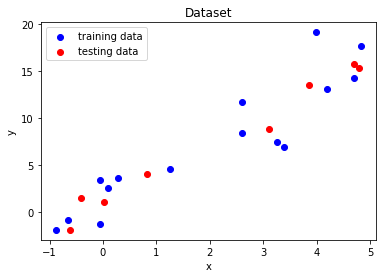

In [317]:
# Example line with some randomness.
def line(x):
    return 3*x + 2 + np.random.normal(0, 2, x.shape)

np.random.seed(42)

# Generate the training dataset.
X_train1 = np.random.uniform(-1, 5, 15)
y_train1 = line(X_train1)

# Generate the testing dataset.
X_test1 = np.random.uniform(-1, 5, 8)
y_test1 = line(X_test1)

# Plot the data.
plt.scatter(X_train1, y_train1, c='b', label='training data')
plt.scatter(X_test1, y_test1, c='r', label='testing data')
plt.title('Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Fit a Linear Regression Model to the Training Data

In [318]:
# Create and fit model.
linreg = LinearRegression()
linreg.fit(X_train1, y_train1)

print('Regression Model:\n', linreg, "\n")
print('Model Parameters:\n', linreg.w)

Regression Model:
 y = 1.3386212887349491 + 3.0085416460432146*x_1 

Model Parameters:
 [1.33862129 3.00854165]


#### Use the Fit Model to Make a Prediction on the Testing Data

In [319]:
# Make a prediction with our model.
y_pred1 = linreg.predict(X_test1)

print('Actual Targets: ', np.round(y_test1, 2))
print('Predictions:', np.round(y_pred1, 2))

Actual Targets:  [ 1.04 -1.87 15.76 15.31 13.54  4.02  1.54  8.79]
Predictions: [ 1.41 -0.5  15.46 15.76 12.92  3.83  0.09 10.68]


#### Data and Model visualization

Now that we have fit our model, lets see what it looks like!

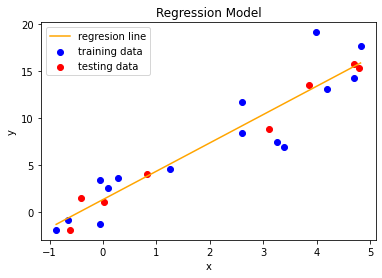

In [320]:
D = np.linspace(np.min(X_train1), np.max(X_train1), 2)
R = linreg.predict(D)

# Plot the model and data.
plt.plot(D, R, label='regresion line', c='orange')
plt.scatter(X_train1, y_train1, c='b', label='training data')
plt.scatter(X_test1, y_test1, c='r', label='testing data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Model')
plt.legend()
plt.show()

#### Metrics
It is important to measure the performance of our model. There are many regression metrics one can use, but we will just look at some of the most popular ones. We want to use the testing data to measure the performance of the model. Here $y$ represents `y_test` and $\hat{y}$ represents `y_pred` which the models predictions on `X_test`.


1. Mean Absolute Error (MAE): The MAE tells us the distance, on average, each point is from the line vertically. The closer MAE is to zero the better the model fits the data.
$$ MAE = \frac{1}{n}\sum\left| y_i-\hat{y_i}  \right| $$

2. Mean Squared Error (MSE): The MSE tells us what the mean squared distance that each point is from the line. Squaring the error makes MSE much more sensative to outliers than MAE. The closer MSE is to zero the better the model fits the data.
$$ MSE = \frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2 $$

3. Root Mean Squared Error (RMSE): RMSE is the square root of MSE and is also sensitive to outliers. RMSD is an aggragate of magnitued of the distance of each point from the line vertically. The closer RMSE is to zero the better the model fits the data.
$$ RMSE = \sqrt{\frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2} = \sqrt{MSE}$$

4. Coefficent of Determination ($r^2$ value): Proportion of the variation in the data that is explained by the model and is a measure of 'goodness of fit'. It is in $0\leq r^2\leq 1$ where $r^2=0$ indicates the model explains none of the variation in the data and $r^2=1$ indicates the model perfectly explains the variation in the data. So the closer $r^2$ is to 1 the better the model fits the data.
$$ r^2 = 1 - \frac{\sum\left( y_i-\hat{y_i}  \right)}{\sum\left( y_i-\bar{y}  \right)}$$

5. Corelation Coefficent (r value): The r value mesures the corelation between the input features and the output targets. $|r| \leq 1$. If r is near 1, there is strong positive correlation. If r is near -1, there is strong negative correlation.
* $0.7 ＜ |r| \leq 1$ - strong correlation
* $0.4 ＜ |r| ＜ 0.7$ - moderate correlation
* $0.2 ＜ |r| ＜ 0.4$ - weak correlation
* $0 \leq |r| ＜ 0.2$ - no correlation
$$r = \frac{\sum (x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^2(y-\bar{y})^2}$$

$$ |r| = \sqrt{r^2} $$

In [321]:
def mae(y1, y2):
    return np.sum(abs(y1-y2))/len(y1)
           
def mse(y1, y2):
    return np.sum((y1-y2)**2) / len(y1)
                  
def rmse(y1, y2):
    return np.sqrt(mse(y1, y2))
                  
def r2(y1, y2):
    return 1 - np.sum((y1-y2)**2) / np.sum((y1-np.mean(y2))**2)
                  
def r(x, y):
    sst_xx = np.sum((x-np.mean(x))**2)
    sst_yy = np.sum((y-np.mean(y))**2)
    sst_xy = np.sum((x-np.mean(x))*(y-np.mean(y)))
    return sst_xy/(np.sqrt(sst_xx*sst_yy))

In [322]:
mae_ = mae(y_test1, y_pred1)
mse_ = mse(y_test1, y_pred1)
rmse_ = rmse(y_test1, y_pred1)
r2_ = r2(y_test1, y_pred1)
r_ = r(X_test1, y_test1)

print('Mean Absolute Error: %.3f' % mae_)
print('Mean Squared Error: %.3f' % mse_)
print('Root Mean Squares Error: %.3f' % rmse_)
print('r2: %.3f' % r2_)
print('r: %.3f' % r_)

Mean Absolute Error: 0.830
Mean Squared Error: 1.052
Root Mean Squares Error: 1.026
r2: 0.976
r: 0.988


#### Ploting Confidence Intervals

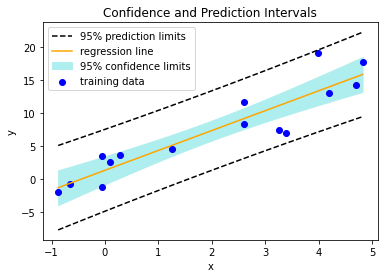

In [323]:
domain = np.linspace(np.min(X_train1), np.max(X_train1)) 
range_ = linreg.predict(domain)

residules = y_train1-linreg.predict(X_train1)

degfredom = len(X_train1)-2 # Degrees of freedom.
s_err = np.sqrt(np.sum(residules**2) / degfredom)
t_crit = sp.stats.t.ppf(0.975, degfredom) # Critical t-value from Student's t-distribution inverse cdf.

pred_int = t_crit*s_err*np.sqrt(1 + 1/len(X_train1) + (domain - np.mean(X_train1))**2 
                                    / np.sum((X_train1 - np.mean(X_train1))**2))
conf_int = t_crit*s_err*np.sqrt(1/len(X_train1) + (domain - np.mean(X_train1))**2 
                                    / np.sum((X_train1 - np.mean(X_train1))**2))


# Plot the confidence intervals.
plt.fill_between(domain, range_+conf_int, range_-conf_int, color="paleturquoise", 
                 label='95% confidence limits')
plt.plot(domain, range_-pred_int, '--', c='black',
         label='95% prediction limits')
plt.plot(domain, range_+pred_int, '--', c='black')
plt.plot(domain, range_, label='regression line', c='orange')
plt.scatter(X_train1, y_train1, c='b', label='training data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Confidence and Prediction Intervals')
plt.legend()
plt.show()

## 3. Multiple Regression

Now we will look fiting some $n$-dimensional hyperplane to some data with $n$ features.

#### Generate Data

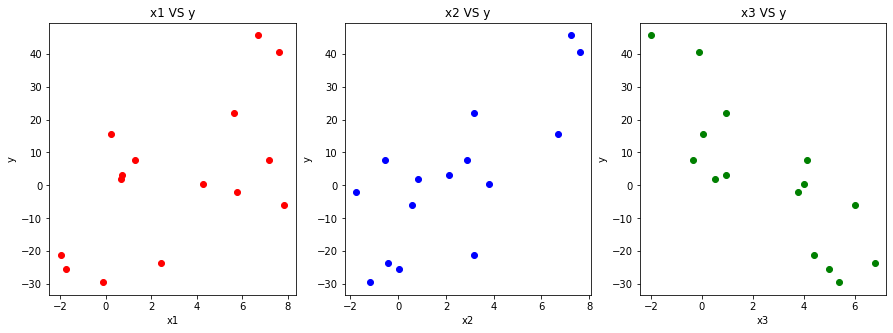

In [324]:
def hypPlane(X):
    return 3*X[:,0] + 2*X[:,1] - 5*X[:,2] + 1 + np.random.normal(0, 2, len(X))

np.random.seed(5)
# Training data
X_train2 = np.random.uniform(-2, 8, size=(15, 3))
y_train2 = hypPlane(X_train2)

# Testing data
X_test2 = np.random.uniform(-2, 8, size=(8, 3))
y_test2 = hypPlane(X_test2)

# Plot data
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
colors=['r', 'b', 'g']

for i in range(len(X_train2[0])):
    plt.subplot(1, 3, i+1)
    plt.title('x' + str(i+1) + ' VS y')
    plt.scatter(X_train2[:, i], y_train2, c=colors[i])
    plt.ylabel('y')
    plt.xlabel('x' + str(i+1))

#### Fit a Linear Regression Model to the Training Data

In [325]:
multreg = LinearRegression()
multreg.fit(X_train2, y_train2)

print('Regression Model:\n', multreg, "\n")
print('Model Parameters:\n', multreg.w)

Regression Model:
 y = 2.8592781562368876 + 2.943807572925703*x_1 + 1.8025687144405447*x_2 + -5.161280219189672*x_3 

Model Parameters:
 [ 2.85927816  2.94380757  1.80256871 -5.16128022]


In [326]:
y_pred2 = multreg.predict(X_test2)

print('Actual Targets: ', np.round(y_test2, 2))
print('Predictions:', np.round(y_pred2, 2))

Actual Targets:  [ 15.43 -22.8    2.05  -7.12   3.43 -13.72  35.96   5.56]
Predictions: [ 18.31 -22.19   0.1  -10.9    4.32 -12.77  38.04   6.31]


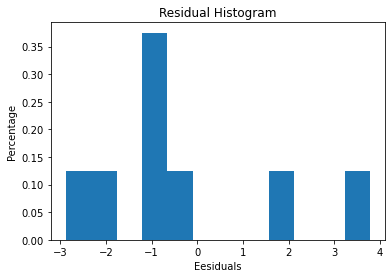

In [327]:
plt.hist((y_test2-y_pred2), bins=12, weights=np.ones(len(y_test2))/len(y_test2))
plt.title('Residual Histogram')
plt.xlabel('Eesiduals')
plt.ylabel('Percentage')
plt.show()

#### Metrics

$$ MAE = \frac{1}{n}\sum\left| y_i-\hat{y_i}  \right| $$

$$ MSE = \frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2 $$

$$ RMSE = \sqrt{\frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2} = \sqrt{MSE}$$

$$ r^2 = 1 - \frac{\sum\left( y_i-\hat{y_i}  \right)}{\sum\left( y_i-\bar{y}  \right)} $$

In [333]:
mae_ = mae(y_test2, y_pred2)
mse_ = mse(y_test2, y_pred2)
rmse_ = rmse(y_test2, y_pred2)
r2_ = r2(y_test2, y_pred2)

print('Mean Absolute Error: %.3f' % mae_)
print('Mean Squared Error: %.3f' % mse_)
print('Root Mean Squares Error: %.3f' % rmse_)
print('r2: %.3f' % r2_)

from sklearn.metrics import r2_score

Mean Absolute Error: 1.739
Mean Squared Error: 4.174
Root Mean Squares Error: 2.043
r2: 0.985


## 4. Polynomial Regression

In [ ]:
def poly(x):
    return -0.1*x**3 + 0.8*x**2 + 2*x + 1 + np.random.normal(0, 2, len(x))

np.random.seed(123)
X_train3 = np.random.uniform(-5, 10, 15)
y_train3 = poly(X_train3)

X_test3 = np.random.uniform(-5, 10, 8)
y_test3 = poly(X_test3)

plt.scatter(X_train3, y_train3, label='training data', c='b')
plt.scatter(X_test3, y_test3, label='testing data', c='r')
plt.title('Polynomial Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
def poly_features(x, deg):
    X = np.zeros((len(x), deg))
    
    for i in range(deg):
        X[:, i] = x**(i+1)
    
    return X

degree = 3 # Degree of the polynomial

polyreg = LinearRegression(poly=True)
polyreg.fit(poly_features(X_train3, degree), y_train3)

print('Regression Model:\n', polyreg, "\n")
print('Model Parameters:\n', polyreg.w)

In [ ]:
y_pred3 = polyreg.predict(poly_features(X_test3, 3))

print('Actual Targets: ', np.round(y_test3, 2))
print('Predictions:', np.round(y_pred3, 2))

In [ ]:
D = np.linspace(np.min(X_train3), np.max(X_train3), 50)
R = polyreg.predict(poly_features(D, degree))

plt.plot(D, R, label='regresion polynomial', c='orange')
plt.scatter(X_train3, y_train3, c='b', label='training data')
plt.scatter(X_test3, y_test3, c='r', label='testing data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Model')
plt.show()

#### Metrics

$$ MAE = \frac{1}{n}\sum\left| y_i-\hat{y_i}  \right| $$

$$ MSE = \frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2 $$

$$ RMSE = \sqrt{\frac{1}{n}\sum\left( y_i-\hat{y_i}  \right)^2} = \sqrt{MSE}$$

$$ r^2 = 1 - \frac{\sum\left( y_i-\hat{y_i}  \right)}{\sum\left( y_i-\bar{y}  \right)} $$

$$ r = \sqrt{r^2} $$

In [ ]:
mae_ = mae(y_test3, y_pred3)
mse_ = mse(y_test3, y_pred3)
rmse_ = rmse(y_test3, y_pred3)
r2_ = r2(y_test3, y_pred3)
r_ = r(X_test3, y_test3)

print('Mean Absolute Error: %.3f' % mae_)
print('Mean Squared Error: %.3f' % mse_)
print('Root Mean Squares Error: %.3f' % rmse_)
print('r2: %.3f' % r2_)
print('r: %.3f' % r_)

In [ ]:
domain = np.linspace(np.min(X_train3), np.max(X_train3)) 
range_ = polyreg.predict(poly_features(domain, degree))

residules = y_train-polyreg.predict(poly_features(X_train3, degree))

degfredom = len(X_train)-2 # Degrees of freedom.
s_err = np.sqrt(np.sum(residules**2) / degfredom)
t_crit = sp.stats.t.ppf(0.975, degfredom) # Critical t-value from Student's t-distribution inverse cdf.

pred_int = t_crit*s_err*np.sqrt(1 + 1/len(X_train3) + 
                                (domain - np.mean(X_train3))**2 / np.sum((X_train3 - np.mean(X_train3))**2))
conf_int = t_crit*s_err*np.sqrt(1/len(X_train) + 
                                (domain - np.mean(X_train3))**2 / np.sum((X_train3 - np.mean(X_train3))**2))


# Plot the confidence intervals.
plt.fill_between(domain, range_+conf_int, range_-conf_int, color="paleturquoise", 
                 label='95% confidence limits')
plt.plot(domain, range_-pred_int, '--', c='black',
         label='95% prediction limits')
plt.plot(domain, range_+pred_int, '--', c='black')
plt.plot(domain, range_, label='regression line', c='orange')
plt.scatter(X_train3, y_train3, c='b', label='training data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Confidence and Prediction Intervals')
plt.legend()
plt.show()